In [21]:
import cv2

In [23]:
from ultralytics import YOLO
print("✅ YOLO imported successfully!")

✅ YOLO imported successfully!


In [24]:
import os
print("Current working directory:", os.getcwd())
print(os.listdir(r"C:\Users\KIIT\Downloads\object detection"))
print(os.getcwd())
print(os.listdir(r'C:\Users\KIIT\Downloads\object detection'))

Current working directory: C:\Users\KIIT
['car.jpg', 'frozen_inference_graph.pb', 'Labels.txt', 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt', 'traffic.jpeg']
C:\Users\KIIT
['car.jpg', 'frozen_inference_graph.pb', 'Labels.txt', 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt', 'traffic.jpeg']


In [25]:
import numpy as np

In [26]:
import matplotlib.pyplot as plt

In [27]:
config_file = r"C:\Users\KIIT\Downloads\object detection\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

frozen_model = r"C:\Users\KIIT\Downloads\object detection\frozen_inference_graph.pb"


In [28]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001FC4B9C6530>

In [29]:
classLabels = []
file_name = r"C:\Users\KIIT\Downloads\object detection\Labels.txt"
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [32]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [31]:
print(len(classLabels))

80


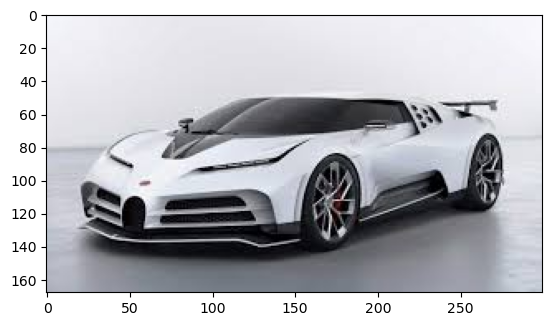

In [42]:
img = cv2.imread(R'C:\Users\KIIT\Downloads\object detection\car.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

In [44]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001FC54BBF490>

In [46]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [48]:
print(ClassIndex)

[3]


In [50]:
font_scale = 0.7
font = cv2.FONT_HERSHEY_SIMPLEX

conf_threshold = 0.5
nms_threshold = 0.4

# Convert bbox to list of [x, y, w, h]
boxes = []
confs = []
class_ids = []

for class_id, conf, box in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    if conf > conf_threshold:
        x, y, w, h = box
        boxes.append([x, y, w, h])
        confs.append(float(conf))
        class_ids.append(int(class_id))

# Apply Non-Maximum Suppression (NMS)
indices = cv2.dnn.NMSBoxes(boxes, confs, conf_threshold, nms_threshold)

# Draw boxes only for filtered results
for i in indices:
    i = int(i)
    x, y, w, h = boxes[i]
    label = f"{classLabels[class_ids[i]-1]}: {confs[i]:.2f}"

    # Draw bounding box
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Draw filled rectangle for text background
    (text_w, text_h), baseline = cv2.getTextSize(label, font, font_scale, 2)
    cv2.rectangle(img, (x, y - text_h - baseline), (x + text_w, y), (0, 0, 255), -1)

    # Put label text
    cv2.putText(img, label, (x, y - 5), font, font_scale, (255, 255, 255), 2)


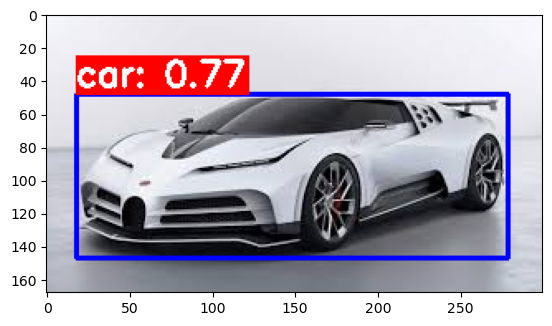

In [52]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))